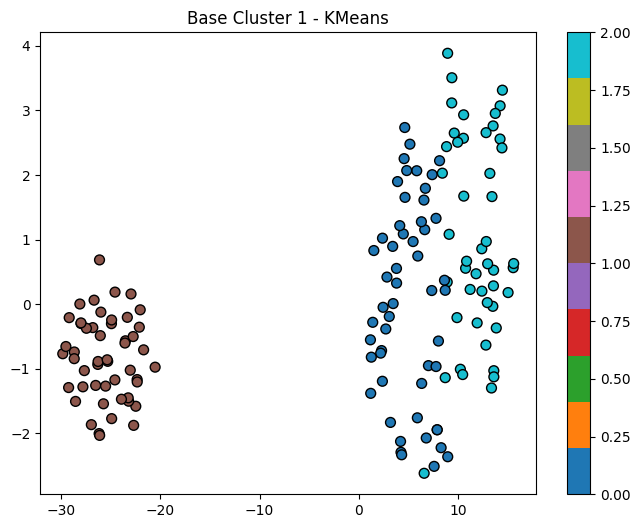

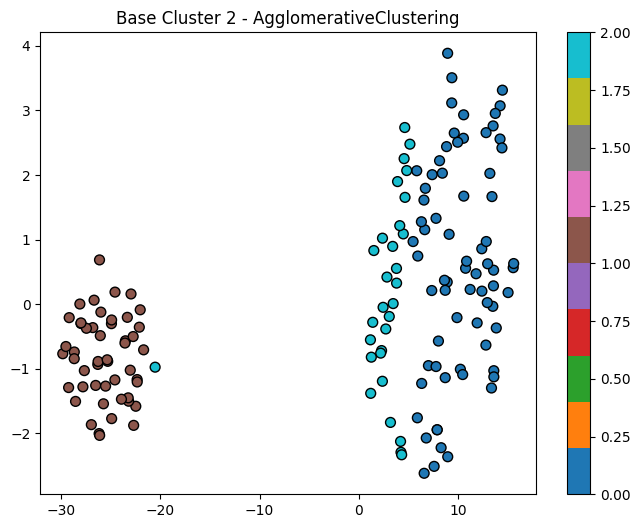

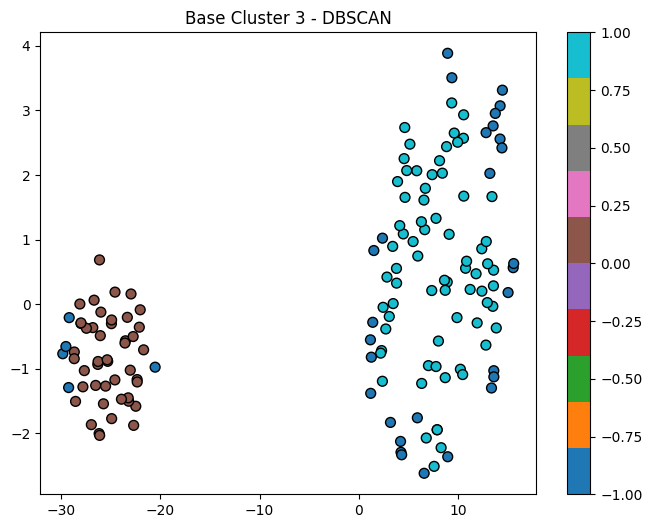

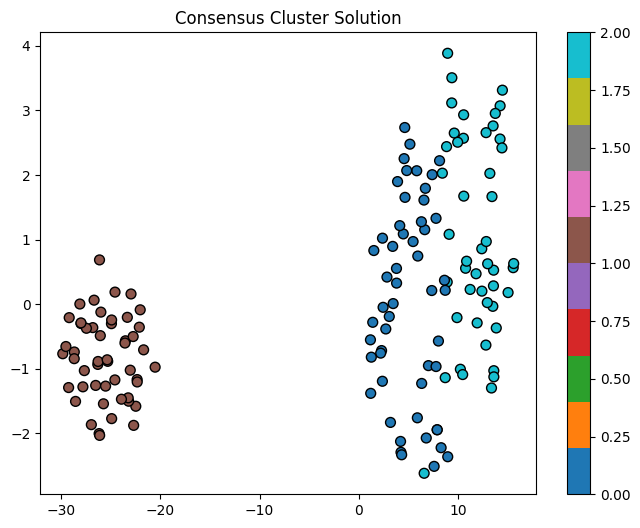

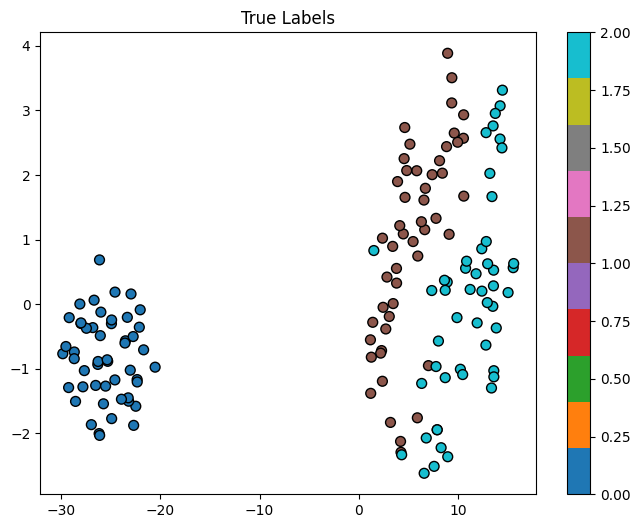

Adjusted Rand Index (ARI): 0.6201351808870379
Normalized Mutual Information (NMI): 0.659486892724918
Silhouette Score: 0.45994823920518635


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
X = StandardScaler().fit_transform(X)

# Define clustering algorithms for base clusters
clustering_algorithms = [
    KMeans(n_clusters=3, random_state=0),
    AgglomerativeClustering(n_clusters=3),
    DBSCAN(eps=0.5, min_samples=5)
]

# Apply clustering algorithms and store the base cluster labels
base_clusters = []
for algo in clustering_algorithms:
    cluster_labels = algo.fit_predict(X)
    base_clusters.append(cluster_labels)

# Initialize the co-association matrix
n_samples = X.shape[0]
co_assoc_matrix = np.zeros((n_samples, n_samples))

# Populate the co-association matrix by counting co-occurrences
for labels in base_clusters:
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            if labels[i] == labels[j]:
                co_assoc_matrix[i, j] += 1
                co_assoc_matrix[j, i] += 1

# Normalize the co-association matrix
co_assoc_matrix /= len(base_clusters)

# Apply Agglomerative Clustering on the co-association matrix for consensus clustering
distance_matrix = 1 - co_assoc_matrix
agglo = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average')
consensus_labels = agglo.fit_predict(distance_matrix)

# Reduce dimensionality to 2D for visualization
dim_reducer = TSNE(n_components=2, random_state=0)
X_2d = dim_reducer.fit_transform(X)

# Define a function to plot clusters
def plot_clusters(data_2d, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Plot each base cluster
for i, (algo, labels) in enumerate(zip(clustering_algorithms, base_clusters)):
    plot_clusters(X_2d, labels, title=f"Base Cluster {i+1} - {type(algo).__name__}")

# Plot final consensus cluster solution
plot_clusters(X_2d, consensus_labels, title="Consensus Cluster Solution")

# Optional: Plot the ground truth labels for reference
plot_clusters(X_2d, y_true, title="True Labels")

# Calculate evaluation metrics
ari = adjusted_rand_score(y_true, consensus_labels)
nmi = normalized_mutual_info_score(y_true, consensus_labels)
silhouette_avg = silhouette_score(X, consensus_labels)

# Print the evaluation metrics
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")
print(f"Silhouette Score: {silhouette_avg}")
